<h1 style="color: navy bleu;text-align:center">  M2 MAS DS- Compte rendu du Tp introductif en Big Data  

<h2 style="color: navy bleu"> Saïda Guezoui, groupe DS </h2>

<h2 style="color: navy bleu"> I. Introduction  

La data science prend aujourd'hui une place importante dans le marché des entreprises et c'est un domaine très vaste où on retrouve plusieurs techniques comme le Bootstrap, une technique qui est utilisée par exemple dans le cas où nous n'avons pas beaucoup de données. 

Le bootstrap est un algorithme permettant l'obtention de plusieurs échantillons à partir de notre échantillon origine. Cet algorithme consiste à faire un ré-echantillonage avec remise d'un jeu de donnée pour avoir des échantillons statistiques qui ont la même taille que notre échantillon initial. 

Bien que le bootstrap ne requiert pas que les données suivent une distribution statistique précise, cela
ne signifie pas que la méthode ne fait aucune supposition. En particulier, le ré-échantillonnage doit être
représentatif de la façon dont l’échantillon original a été obtenu. 

Il existe deux types de bootstrap, paramétrique et non paramétrique.

<h3 style="color: navy bleu"> Importation des bibliothèques nécessaires 

Nous allons commencer par importer les bibliothèques nécessaires : 

In [154]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy.stats import norm

<h2 style="color: navy bleu"> II. Etude du jeu de donnée "student_score"

Dans cette partie, nous allons étudier le jeu de données "student_score" pour estimer le paramètre $\theta$ et découvrir l'algorithme du Bootstrap. 

<h3 style="color: navy bleu"> A. Importation du jeu de données et calcul de la matrice de correlation 

In [155]:
# Importation des données du fichier txt
score = np.genfromtxt(fname = "student_score.txt")

# Création d'un DataFrame
score_student  = pd.DataFrame(score,columns = ['mech' , 'vecs', 'alg', 'analy', 'stat'])

# On supprime la première ligne qui ne contient que des NaN
score_student = score_student.drop(score_student.index[0])

score_student

,mech,vecs,alg,analy,stat
1,7.0,51.0,43.0,17.0,22.0
2,44.0,69.0,53.0,53.0,53.0
3,49.0,41.0,61.0,49.0,64.0
4,59.0,70.0,68.0,62.0,56.0
5,34.0,42.0,50.0,47.0,29.0
6,46.0,40.0,47.0,29.0,17.0
7,0.0,40.0,21.0,9.0,14.0
8,32.0,45.0,49.0,57.0,64.0
9,49.0,57.0,47.0,39.0,26.0
10,52.0,64.0,60.0,63.0,54.0



 Matrice de corellation :


<AxesSubplot:>

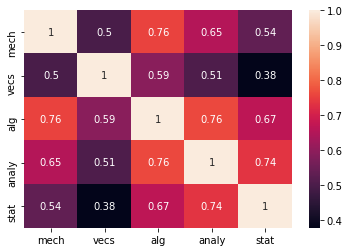

In [156]:
# Calcul des correlations entre les variables

correlation = score_student.corr()
print("\n Matrice de corellation :")
sns.heatmap(data = correlation, annot=True)

La matrice de corrélation montre que les deux variables des 3 couples : ("alg","mech"),("analy" ,"alg") et ("analy","stat") sont fortement corrélées positivement avec des coefficients de corrélation entre 0.74 et 0.76.  

<h3 style="color: navy bleu"> B. Estimation du paramètre $\theta$ 

Maintenant, nous allons calculer la valeur estimée de $\theta$ avec la formule suivante : 
    $$\theta = \frac{\lambda_{max}}{sum(\lambda)}$$

In [157]:
# Calcul des valeurs et vecteurs propres de la matrice des corrélations
v, vp = np.linalg.eig(correlation)

# Calcul de Theta
theta = max(v)/ sum(v)
print("Theta = ", theta)

Theta =  0.6925353153076885


La valeur de $\theta$ estimée est d'environ 0.7

<h3 style="color: navy bleu">  C. Définition de la fonction boostrap 

Nous définissons la fonction boostrap comme une fonction qui prend en paramètre un data donné et un nombre B fixé à 2000 dans cette partie. 
On cherche à obtenir les valeurs de notre vecteur $\hat{\theta} $, nous faisons donc un ré-echantillage avec remise sur notre jeu de données, puis sur la matrice de correlation. Ensuite, nous appliquons la formule de $\theta$ suivante pour avoir notre liste des $\hat{\theta}$ : 

$$\theta = \frac{\lambda_{max}}{sum(\lambda)}$$

Avec $\lambda_{max}$ est la valeur propre maximale. En appliquant cette fonction au jeu de données "score_student", nous obtenons alors un vecteur de $\hat{\theta}$ de taille 2000.

In [158]:
def boostrap(data,B):
    theta_list = []
    
    for _ in range(B):
        
        sample = data.sample(n = len(data.index), replace = True) 
        
        correlation = sample.corr()

        eigenvalue, eigenvector = np.linalg.eig(correlation)
        
        theta = max(eigenvalue)/sum(eigenvalue)
        theta_list.append(theta)
        
    return theta_list

theta_list = boostrap(score_student,B = 2000)


<h3 style="color: navy bleu">  D. Représentation sous forme d'histogramme 

2000


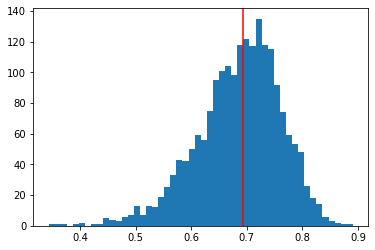

In [231]:
plt.hist(theta_list,  bins = 50)
print(np.size(theta_list))
plt.axvline(x = theta, c = 'red')

Dans l'histograme ci-dessus, on retrouve la valeur de $\theta$ estimée en ligne rouge et les autres valeurs trouvées grâce au bootstrap réparties entre environ 0.3 et 0.88. 

<h3 style="color: navy bleu">  E. L'erreur standard 

In [160]:
std = np.std(theta_list)
std

0.07546539419473271

L'erreur standard trouvée est d'environ 0.08

<h3 style="color: navy bleu">  F. Intervalle de confiance 

Considérons un niveau de confiance de 5%. On définit l'intervalle de confiance ainsi : 

$$\theta \in \left[\hat{\theta} - sd * \Phi^{-1}(1-\frac{\alpha}{2}), \hat{\theta} +sd * \Phi^{-1}(1-\frac{\alpha}{2})\right] $$

Avec sd est l'erreur standard et $\Phi^{-1}(1-\frac{\alpha}{2})$ est le quantile d'ordre $1-\frac{\alpha}{2}$ de la loi normale centrée réduite.

In [161]:
quantile = norm.ppf(0.975,0,1)
Ic_inf = theta - std * quantile
Ic_sup = theta + std * quantile
Ic = [Ic_inf,Ic_sup]
print(Ic)
print(theta)

[0.5446258606068943, 0.8404447700084827]
0.6925353153076885


L'intervalle de confiance trouvé est : $[0.54, 0.84]$. On peut donc être sur à 95% que $\theta$ se trouve environ entre 0.54 et 0.84.  

<h2 style="color: navy bleu"> III. Etude du jeu de données "diabete"

Dans cette partie, on s'intéresse au jeu de données "diabete" contenant des informations sur diabète des indiennes Pima. Nous cherchons à prédire la survenue du diabète à l'aide de la régression logistique en utilisant les autres covariables.   


<h3 style="color: navy bleu"> A. Importation du jeu de données

In [162]:
pima = pd.read_csv("diabetes.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h3 style="color: navy bleu"> B. Création du Design et de la variable à prédire "Outcome" 

In [163]:
# Extraction des classes à prédire
Design_pima = pima.copy().drop("Outcome", axis = 1)

# Variable à prédire 
Y_pima = pima["Outcome"]  

<h3 style="color: navy bleu">  C. Application du modèle de regression logistique 

In [164]:
# Création du modèle
model_pima = LogisticRegression(max_iter = 300) 

# Apprentissage
model_pima.fit(Design_pima, Y_pima) 

# Test du modèle (score) 
print("Score : ", model_pima.score(Design_pima,Y_pima)) 

# Paramètres du modèle 
intercept_pima = model_pima.intercept_
coefs_pima = model_pima.coef_

Score :  0.78125


<h3 style="color: navy bleu">  D. Application du bootstrap paramétrique  

<h4 style="color: navy bleu">  D.1.Définition de la fonction logit et du $\hat{p}$ 

In [165]:
# Logit
def g(x): 
    return np.exp(x) / (1 + np.exp(x))

# Calcul de p_hat 
p_hat = g(intercept_pima + coefs_pima.dot(Design_pima.T))[0]

<h4 style="color: navy bleu">  D.2. Définition de la fonction bootstrap_para

In [166]:
def bootstrap_para(B) :
    Coefs = []
    Intercepts = []
    
    for _ in range(B) :
        Y_pima_hat = np.random.binomial(n = 1, p = p_hat, size = len(p_hat))
        model_pima.fit(Design_pima, Y_pima_hat)
        Coefs.append(model_pima.coef_[0])
        Intercepts.append(float(model_pima.intercept_))
                                    
    return Coefs, Intercepts

vect_coef, liste_intercepts = bootstrap_para(2000) 

<h4 style="color: navy bleu">  D.3 Affichage des distributions des coefficients sous forme d'histogrammes 

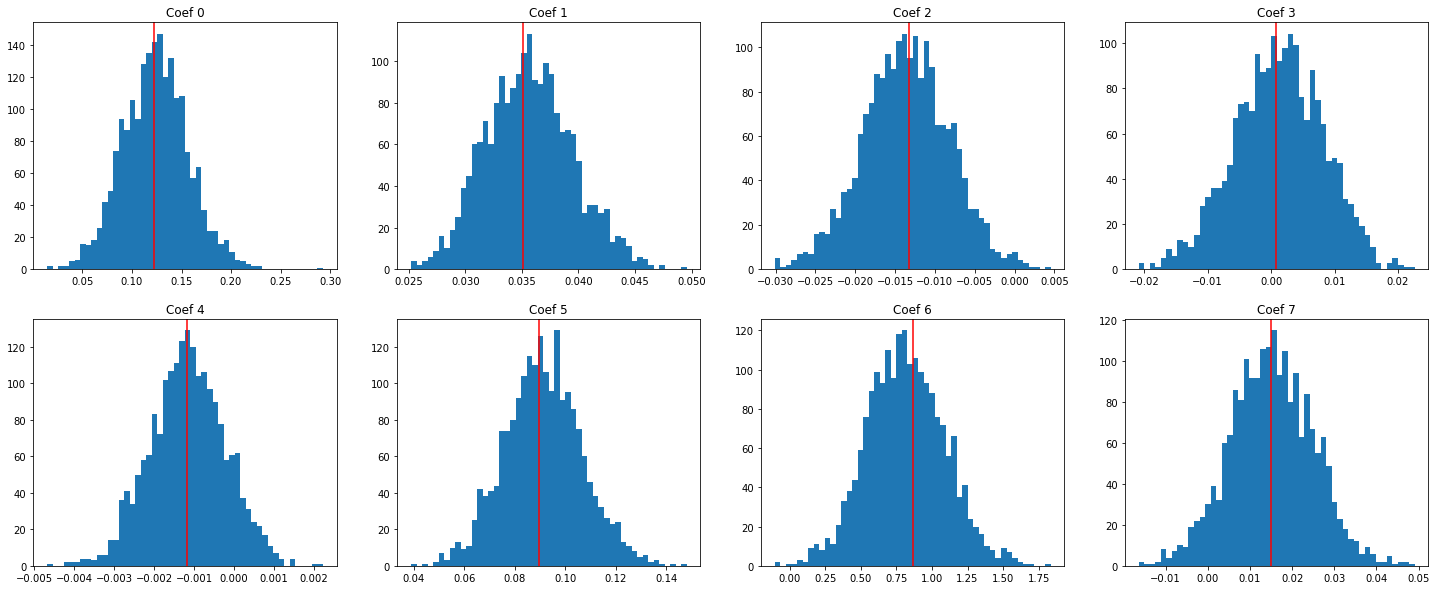

In [187]:
plt.figure(figsize=(25,10))
for j in range(len(vect_coef[0])):   # Pour chaque valeur d'un vecteur (0 à 7)
    value_hist = []
    for i in range(len(vect_coef)) : # On parcourt tous les vecteurs (0 à 1999) pour récupérer leur jème valeur 
        value_hist.append(vect_coef[i][j])
    plt.subplot(2, int(len(vect_coef[0])/2), j+1)
    plt.hist(value_hist, bins = 50)
    plt.axvline(coefs_pima[0][j], c = 'red')
    plt.title(f"Coef {j}")
plt.show()


<h4 style="color: navy bleu">  D.4.Affichage des distributions des intercepts sous forme d'histogrammes 

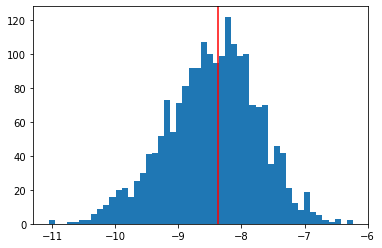

In [225]:
plt.hist(liste_intercepts,bins = 50)
plt.axvline(intercept_pima, c = 'red')
plt.show()

<h4 style="color: navy bleu">  D.5. Intervalles de confiance 

In [169]:
quantile = norm.ppf(0.95,0,1)
for i in range(8):
    std1 = np.std(np.array(vect_coef)[:,i])
    Ic_inf = np.mean(np.array(vect_coef)[:,i]) - std1 * quantile
    Ic_sup = np.mean(np.array(vect_coef)[:,i]) + std1 * quantile
    Ic = [Ic_inf,Ic_sup]
    print("Coef", i, " : ", Ic)

Coef 0  :  [0.06965209737709388, 0.17787340147223368]
Coef 1  :  [0.02933271648950926, 0.04194192237180139]
Coef 2  :  [-0.022508306549741265, -0.004685580783149011]
Coef 3  :  [-0.010315521151835608, 0.012685661206447079]
Coef 4  :  [-0.0027088918994191374, 0.0003817371060324563]
Coef 5  :  [0.0659197786010276, 0.11646499276362277]
Coef 6  :  [0.36466033957379484, 1.2651130382089015]
Coef 7  :  [-0.0011044588656050035, 0.03136629222961705]


Une distribution bootstrap se rapproche de la distribution d'échantillonnage de la statistique. 95 % des valeurs du milieu de la distribution bootstrap fournissent donc un intervalle de confiance à 95 % pour le paramètre.

D'après les résultats, les coefs 0,1,5 et 6 sont positifs, on peut donc s'attendre à avoir une corrélation positive entre les variables explicatives associées à ces coefs et la variable à expliquer. Pour le coef 2, il est négatif. Concernant les coefs 2,3,4 et 7, on ne peut rien dire à propos de leurs signes. 

<h2 style="color: navy bleu"> IV. Etude du jeu de données "housing"

Nous nous intéressons cette fois-ci aux prix des logements dans différents quartiers de Boston. La variable en question est "MEDV". Nous cherchons à prédire ce prix en fonction des autres covariables lstat, ptratio et rm en utilisant un modèle de régression linéaire et un algorithme de bootstrap non paramétrique. 

<h3 style="color: navy bleu"> A. Importation du jeu de données housing et calcul de la matrice de corélation 

In [170]:
housing = pd.read_csv("housing.csv")
housing  = pd.DataFrame(housing,columns = ['RM' , 'LSTAT', 'PTRATIO', 'MEDV'])

# Suppression de la premiere colonne d'indice 
housing = housing.drop(housing.index[0])
housing

,RM,LSTAT,PTRATIO,MEDV
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


<AxesSubplot:>

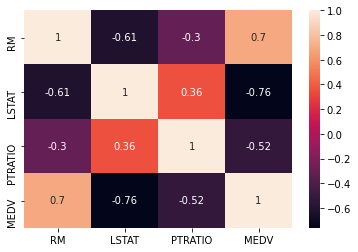

In [171]:
# Etude de la correlation
correlation = housing.corr().round(2)
sns.heatmap(data = correlation, annot=True)

Nous constatons que la variable MEDV est corélée positivement avec la variable RM et négativement avec les variables LSTAT et PTRATIO. Nous pouvons donc appliquer un modèle de régression linéaire. 

<h3 style="color: navy bleu"> B. Création du Design et de la variable à prédire log(MEDV)

In [172]:
# Variable à prédire Y = log(MEDV) 
Y_housing = np.log(housing['MEDV'])
# Design 
Design_housing = housing.drop('MEDV',1)

<h3 style="color: navy bleu"> C. Application de la régression linéaire

Les coeficients de la régression linéaire : 
 [ 0.09899051 -0.03378928 -0.04032085]

L'intercept de la régression linéaire : 
 13.52459914372183


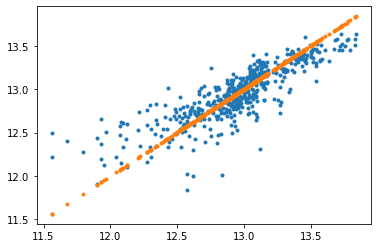

In [173]:
REG_housing = LinearRegression()
# Entrainement du modèle 
Results = REG_housing.fit(Design_housing, Y_housing)

# Coefs et intercept
Coefs_housing = REG_housing.coef_
Intercept_housing = REG_housing.intercept_

# Affichage 
print("Les coeficients de la régression linéaire : \n", Coefs_housing)
print("\nL'intercept de la régression linéaire : \n", Intercept_housing)

# Nuage de points de la regression 
plt.plot(Y_housing, REG_housing.predict(Design_housing),'.')
plt.plot(Y_housing, Y_housing,'.')
plt.show()

Le nuage de points ci-dessus permet de voir si on a une bonne prédiction. En effet, la droite de référence est représentée en orange, dans le cas où la prédiction est de bonne qualité, le nuage de points se rapproche de la droite orange. En revanche, on remarque ici que la prédiction n'est pas parfaite notamment pour les points qui sont entre 11.5 et 12.5

##### Calcul du $\sigma^2$ et $\epsilon$

In [174]:
RMSE = np.sqrt(((Y_housing - REG_housing.predict(Design_housing))**2).sum()/len(Y_housing))
print(RMSE)

Epsilon = Y_housing - Intercept_housing - Coefs_housing.dot(Design_housing.T)

0.2047423190591912


#### Hypothèse paramétrique

Nous rappelons que le test de nullité des paramètres du modèle est définit par : 
$$H_0 : \beta_j = 0 \quad  \forall j $$

Avec $\beta_j$ est le paramètre associé à la variable explicative $X^j$. 

Sous l'hypothèse alternative, au moins un des paramètres est non nul.

On définit l'intervalle de confiance ainsi : 

$$\theta \in \left[\hat{\theta} - sd * \Phi^{-1}(1-\frac{\alpha}{2}), \hat{\theta} +sd * \Phi^{-1}(1-\frac{\alpha}{2})\right] $$

Avec sd est l'erreur standard et $\Phi^{-1}(1-\frac{\alpha}{2})$ est le quantile d'ordre $1-\frac{\alpha}{2}$ de la loi normale centrée réduite.

On suppose donc que la distribution de $\hat{θ}$ n'est pas éloignée d'une distribution gaussienne. Ce qui est souvent vrai lorsque n est grand. 

<h3 style="color: navy bleu"> D. Application du bootstrap non paramétrique  

Une façon de faire du bootstrap non paramétrique est de faire un réechantillonage avec remise des résidus ou de la matrice de design. 

<h4 style="color: navy bleu"> D.1. Réechantillonage des résidus $\epsilon$

In [175]:
def bootstrap_non_para_epsilon(B) :
    Coefs = []
    Intercepts = []
    
    for _ in range(B) :
        Epsilon_star = np.random.normal(0, RMSE**2, len(Epsilon))
        Y_housing_hat = Intercept_housing + Coefs_housing.dot(Design_housing.T) + Epsilon_star
        REG_housing.fit(Design_housing, Y_housing_hat)
        Coefs.append(REG_housing.coef_)
        Intercepts.append(float(REG_housing.intercept_))
                                    
    return Coefs, Intercepts

Coefs_h_epsilon, Intercepts_h_epsilon = bootstrap_non_para_epsilon(2000)

<h4 style="color: navy bleu">D.1.1. Représentation des distributions des intercepts 

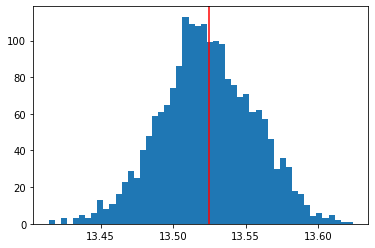

In [226]:
plt.hist(Intercepts_h_epsilon,bins = 50)
plt.axvline(Intercept_housing, c = 'red')
plt.show()

<h4 style="color: navy bleu">D.1.2. Représentation des distributions des coefficients 

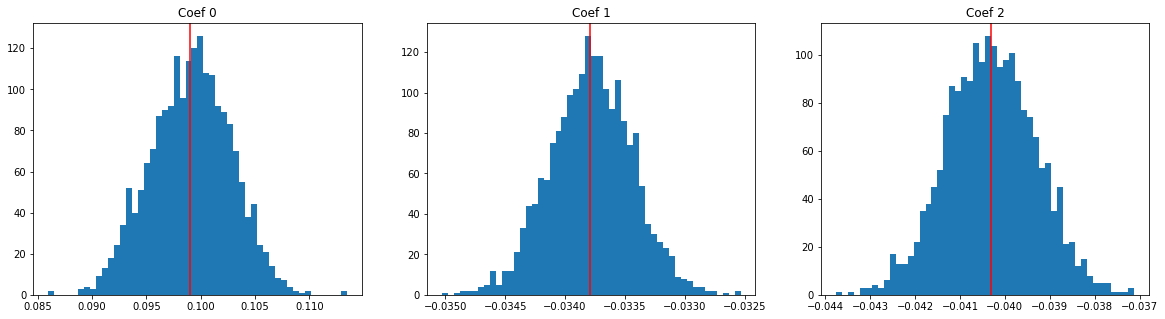

In [227]:
plt.figure(figsize=(20,5))
for j in range(len(Coefs_h[0])): # Pour chaque valeur d'un vecteur (0 à 7), on fait
    value_hist = []
    for i in range(len(Coefs_h_epsilon)) : # On parcourt tous les vecteurs (0 à 1999) pour récupérer leur jème valeur 
        value_hist.append(Coefs_h_epsilon[i][j])
    plt.subplot(1, len(Coefs_h_epsilon[0]), j+1)
    plt.hist(value_hist, bins = 50)
    plt.axvline(Coefs_housing[j], c = 'red')
    plt.title(f"Coef {j}")
plt.show()
    

<h4 style="color: navy bleu">D.1.3. Intervalles de confiance 

In [222]:
Ic_epsilon = []
quantile = norm.ppf(0.975,0,1)
for i in range(3):
    std3= np.std(np.array(Coefs_h_epsilon)[:,i])
    Ic_inf = np.mean(np.array(Coefs_h_epsilon)[:,i]) - std3 * quantile
    Ic_sup = np.mean(np.array(Coefs_h_epsilon)[:,i]) + std3 * quantile
    Ic_epsilon.append([Ic_inf,Ic_sup])
    print("Coef", i, " : ", Ic_epsilon[-1])

Coef 0  :  [0.09191256357280253, 0.10631143242256558]
Coef 1  :  [-0.03446061003975547, -0.03310366319846161]
Coef 2  :  [-0.04225263526406827, -0.03836672639842815]


Les résultats montrent qu'à 95% de confiance, le coef 0 est positif et compris entre 0.09 et 0.10 et les deux autres coefs sont négatifs. 

<h4 style="color: navy bleu">D.2.  Réechantillonage des observations  

In [192]:
def bootstrap_non_para_obs(B) :
    coefs = []
    intercepts = []
    for _ in range(B) :
        sample = housing.sample(n = len(housing.index), replace = True)
        # Variable à prédire Y = log(MEDV) 
        Y_housing = np.log(sample['MEDV'])
        # Design 
        Design_housing = sample.drop('MEDV',1)
        
        REG_housing.fit(Design_housing, Y_housing)

        coefs.append(REG_housing.coef_)
        intercepts.append(float(REG_housing.intercept_))
                                    
    
        coefs.append(REG_housing.coef_)
        intercepts.append(REG_housing.intercept_)
    return coefs, intercepts
    

Coefs_h_obs, Intercepts_h_obs = bootstrap_non_para_obs(2000)

<h4 style="color: navy bleu">D.2.1. Représentation des distributions des intercepts 

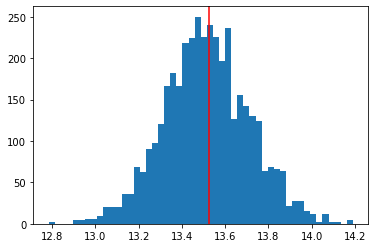

In [228]:
plt.hist(Intercepts_h_obs, bins = 50)
plt.axvline(Intercept_housing, c = 'red')
plt.show()

<h4 style="color: navy bleu">D.2.2. Représentation des distributions des coefficients

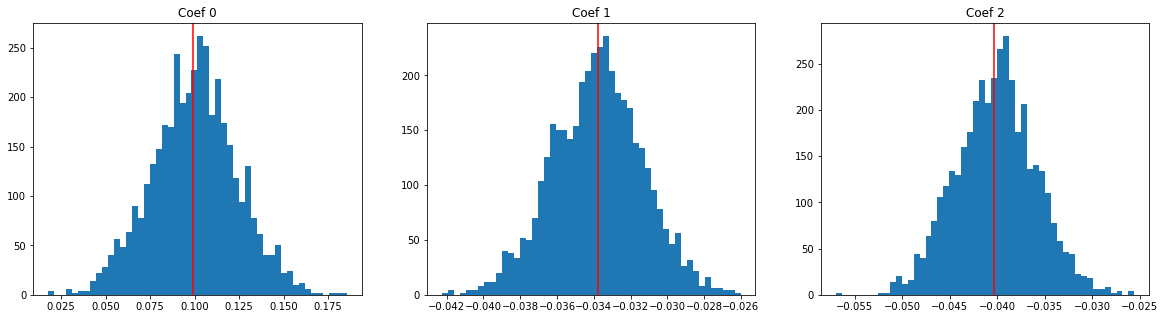

In [230]:
plt.figure(figsize=(20,5))
for j in range(len(Coefs_h_obs[0])):
    value_hist_obs = []
    for i in range(len(Coefs_h_obs)) : 
        value_hist_obs.append(Coefs_h_obs[i][j])
    plt.subplot(1, len(Coefs_h_obs[0]), j+1)
    plt.hist(value_hist_obs,bins = 50)
    plt.axvline(Coefs_housing[j], c = 'red')
    plt.title(f"Coef {j}")
    
plt.show()

<h4 style="color: navy bleu">D.2.3. Intervalles de confiance 

In [220]:
Ic_obs = []
quantile = norm.ppf(0.975,0,1)
for i in range(3):
    std2= np.std(np.array(Coefs_h_obs)[:,i])
    Ic_inf = np.mean(np.array(Coefs_h_obs)[:,i]) - std2 * quantile
    Ic_sup = np.mean(np.array(Coefs_h_obs)[:,i]) + std2 * quantile
    Ic_obs.append([Ic_inf,Ic_sup])
    print("Coef", i, " : ", Ic_obs[-1])

Coef 0  :  [0.053292154756876486, 0.1468033204139608]
Coef 1  :  [-0.03861631523659617, -0.028978087268569985]
Coef 2  :  [-0.0483558126324251, -0.03194421797124559]


<h4 style="color: navy bleu">D.2.4. Comaparaison entre les deux méthodes 

In [223]:
for i in range(len(Ic_obs)):
    print(np.abs(Ic_obs[i][0] - Ic_obs[i][1]), ">", np.abs(Ic_epsilon[i][0] - Ic_epsilon[i][1]))


0.09351116565708431 > 0.014398868849763047
0.009638227968026186 > 0.0013569468412938657
0.016411594661179515 > 0.0038859088656401225


On rappelle que les valeurs de gauches sont les longueurs des intervalles de confiance basés sur le ré-échantillonnage des observations et les valeurs de droite, se sont les longueurs des Ic basés sur ré-échantillonnage des résidus. 

D'après les résultats, les intervalles de confiance basés sur le ré-échantillonnage des résidus tendent à être moins larges que ceux basés sur un ré-échantillonnage des observations. Toutefois, la validité de cette approche requiert que certains critères soient respectés. Les valeurs des prédicteurs doivent être fixes (ce qui est souvent le cas pour un dispositif expérimental) et le modèle de régression doit bien représenter la relation entre les prédicteurs et la réponse. Les résidus n’ont pas besoin de suivre une distribution particulière comme la loi normale, mais ils doivent être indépendants et suivre la même distribution. En particulier, les résidus ne peuvent pas être ré-échantillonnés si leur variance n’est pas homogène. 